In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import mplcyberpunk
import plotly.express as px
from datetime import datetime
import numpy as np
from statistics import median
from math import isnan
from itertools import filterfalse
from fpdf import FPDF
from matplotlib.dates import date2num

# Tratando os dados e criando um Data Frame

In [26]:
def reading_ext():
    
    extratos = [] 
    end_ext = (r'C:\Users\luanr\OneDrive\Documentos\aleatorios\Camila Egan\pj\financeiro\analise\diagnostico\historico\nubank\{}_23\{}.csv')
    meses_ano = {1:'JANEIRO',2:'FEVEREIRO',3:'MARÇO',
                 4:'ABRIL',5:'MAIO',6:'JUNHO',
                 7:'JULHO',8:'AGOSTO',9:'SETEMBRO',
                 10:'OUTUBRO',11:'NOVEMBRO',12:'DEZEMBRO'} 
    hoje = float(datetime.today().strftime('%m'))-1
    
    for mes in meses_ano:
        
        if (hoje >= mes):
            
            ext = pd.read_csv(end_ext.format(mes,meses_ano[mes]))
            extratos.append(ext)
            
        else:
            
            break
    
    return extratos    

In [27]:
reading_ext()

[          date      category                       title   amount
 0   2022-12-13     vestuário  da Mami Confeccoes Imp 4/5   104.38
 1   2022-12-13     vestuário            Centauro Com 2/3    59.99
 2   2022-12-13           NaN          Pagamento recebido -1014.14
 3   2022-12-13     vestuário               Ebw*Shein 3/4    36.84
 4   2022-12-13         lazer  Beto Carrero*Beto Carr 2/4    94.95
 5   2022-12-13   eletrônicos            Mlp*Netshoes 2/6    71.66
 6   2022-12-14     vestuário         Lojas Renner Fl 1/2    59.90
 7   2022-12-14      serviços              Apple.Com/Bill    10.90
 8   2022-12-14     vestuário                  Vivara Mor    40.00
 9   2022-12-14        outros            Tijux Acessorios    10.00
 10  2022-12-16         saúde                 Pague Menos    32.82
 11  2022-12-17    transporte      Posto de Servicos Agua    17.29
 12  2022-12-17  supermercado                 Pag*Aracati    32.00
 13  2022-12-17   eletrônicos                    Ked Ilha    2

In [28]:
def amount():
    
    meses = [0,1,2]
    valor = 0
    amount = []
        
    for mes in meses:
        
        extratos = reading_ext()[mes]
    
        x = len(extratos.index)
        z = 0
    
        while (z < x):
        
            valor = extratos.at[z,'amount']
            amount.append(valor)
            z = z + 1
        
    return amount

In [29]:
def category():
    
    meses = [0,1,2]
    category = []
    label = ''
        
    for mes in meses:
        
        extratos = reading_ext()[mes]
    
        x = len(extratos.index)
        z = 0
    
        while (z < x):
        
            label = extratos.at[z,'category']
            category.append(label)
            z = z + 1
        
    return category

In [30]:
def index():
    
    meses = [0,1,2]
    index = []
    index_ex = []
    
    for mes in meses:
        
        index_mes = len(reading_ext()[mes].index)
        index.append(index_mes)
        
    i = sum(index)
    z = 0
    
    while (z < i):
        
        index_ex.append(z)
        z = z + 1
        
    return index_ex

In [31]:
def data_frame():
    
    df = pd.DataFrame({'Categoria': category(),
                  'Valor': amount()},
                  index=index())
    
    return df

# Reconhecimento superficial da distribuição dos dados

In [70]:
extrato = data_frame().drop(data_frame().index[[2,60,69,71,74,78,87]])
extrato.head()

,Categoria,Valor
0,vestuário,104.38
1,vestuário,59.99
3,vestuário,36.84
4,lazer,94.95
5,eletrônicos,71.66


<Figure size 936x504 with 0 Axes>

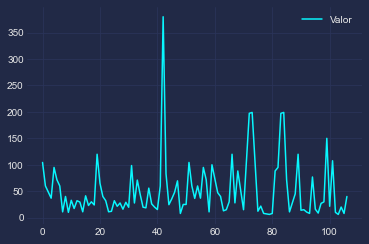

In [157]:
plt.style.use("cyberpunk")
plt.figure(figsize=(13,7))
extrato.plot()
plt.savefig('fluxo.png', dpi = 300)

In [170]:
def moving_avg(period):
    
    plt.figure(figsize=(13,7))
    extrato['Valor'].rolling(window=period).mean().plot(label=f'Média Móvel de {period} Dias')
    extrato['Valor'].plot(label='Fluxo de saída')
    plt.legend()
    plt.show()

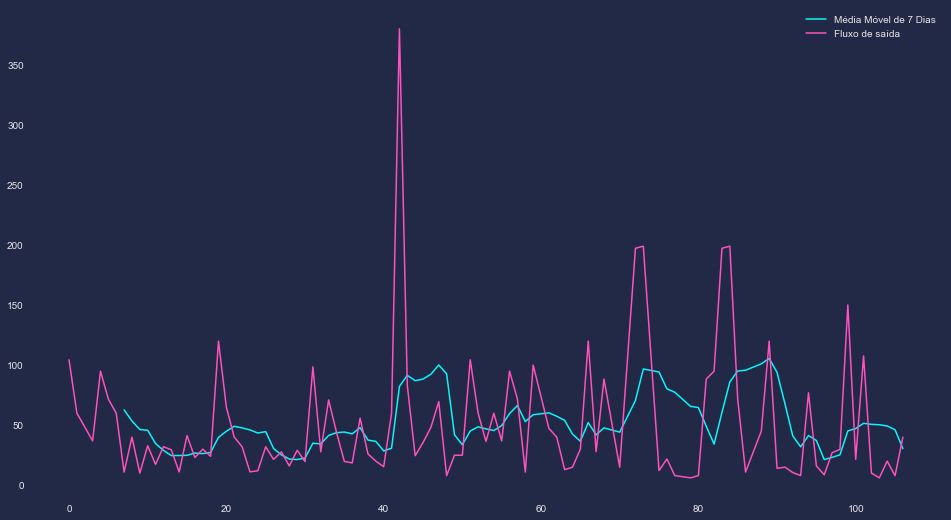

<Figure size 144x144 with 0 Axes>

In [178]:
media7 = moving_avg(7)
plt.savefig('media7.png', dpi = 300)

In [177]:
fig = px.pie(values = extrato['Valor'], names = extrato['Categoria'])
fig.show()

In [37]:
#ANÁLISE SEPARADA DO SUPERMERCADO:
def get_supermercado():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'supermercado'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    pagamento_recebido = sum(valor_total)
    
    return pagamento_recebido

In [90]:
def get_values_supermercado():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'supermercado'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    return valor_total

In [102]:
def count_list(list):
    
    count = 0
    counts = []
    
    for element in list:
        count = count + 1
        counts.append(count)
        
    return counts

In [103]:
def data_frame_supermercado():
    
    df = pd.DataFrame({'Valor': get_values_supermercado()},
                  index=count_list(get_values_supermercado()))
    
    return df

<AxesSubplot:>

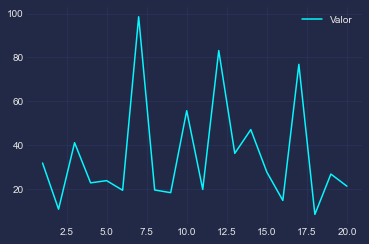

In [106]:
data_frame_supermercado().plot()

In [38]:
#ANÁLISE SEPARADA DO RESTAURANTE:
def get_restaurante():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'restaurante'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    pagamento_recebido = sum(valor_total)
    
    return pagamento_recebido

In [107]:
def get_values_restaurante():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'restaurante'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    return valor_total

In [117]:
def data_frame_restaurante():
    
    df = pd.DataFrame({'Valor': get_values_restaurante()},
                  index=count_list(get_values_restaurante()))
    
    return df

<AxesSubplot:>

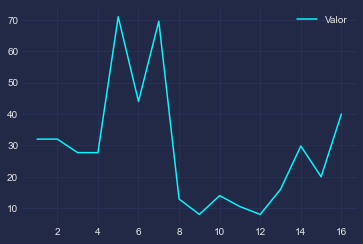

In [120]:
data_frame_restaurante().plot()

In [39]:
#ANÁLISE SEPARADA DO TRANSPORTE:
def get_transporte():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'transporte'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    pagamento_recebido = sum(valor_total)
    
    return pagamento_recebido

In [110]:
def get_values_transporte():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'transporte'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    return valor_total

In [111]:
def data_frame_transporte():
    
    df = pd.DataFrame({'Valor': get_values_transporte()},
                  index=count_list(get_values_transporte()))
    
    return df

<AxesSubplot:>

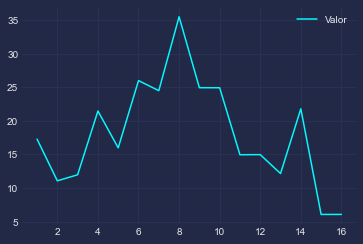

In [112]:
data_frame_transporte().plot()

In [40]:
#ANÁLISE SEPARADA DA CASA:
def get_casa():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'casa'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    pagamento_recebido = sum(valor_total)
    
    return pagamento_recebido

In [113]:
def get_values_casa():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'casa'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    return valor_total

In [114]:
def data_frame_casa():
    
    df = pd.DataFrame({'Valor': get_values_casa()},
                  index=count_list(get_values_casa()))
    
    return df

<AxesSubplot:>

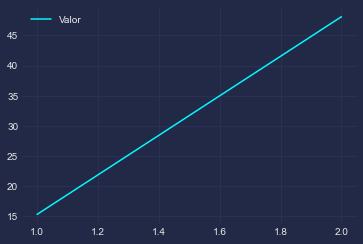

In [115]:
data_frame_casa().plot()

In [127]:
#ANÁLISE SEPARADA DO VESTUÁRIO:
def get_vestuario():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'vestuário'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    pagamento_recebido = sum(valor_total)
    
    return pagamento_recebido

In [128]:
def get_values_vestuario():

    extrato = data_frame()
    
    x = len(extrato.index)
    z = 0
    valor = 0
    valor_total = []
    
    while (z < x):
        
        if (extrato.at[z,'Categoria'] == 'vestuário'):
            valor = extrato.at[z,'Valor']
            valor_total.append(valor)
            z = z + 1
        else:
            z = z + 1
    
    return valor_total

In [131]:
def data_frame_vestuario():
    
    df = pd.DataFrame({'Valor': get_values_vestuario()},
                  index=count_list(get_values_vestuario()))
    
    return df

<AxesSubplot:>

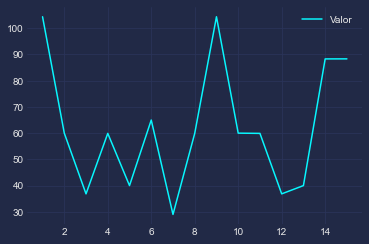

In [133]:
data_frame_vestuario().plot()

# Diagnóstico final

In [74]:
#Total gasto nos últimos três meses (exclusão de março, pois fatura é postecipada)
total = sum(extrato['Valor'])
total

5129.569999999999

In [135]:
#Total em vestuário
total_vestuario = sum(get_values_vestuario())
total_vestuario

932.72

In [137]:
#Média vestuário
data_frame_vestuario().mean()

Valor    62.181333
dtype: float64

In [139]:
#Total em transporte
total_transporte = sum(get_values_transporte())
total_transporte

289.73999999999995

In [140]:
#Média transporte
data_frame_transporte().mean()

Valor    18.10875
dtype: float64

In [141]:
#Total em supermercado
total_supermercado = sum(get_values_supermercado())
total_supermercado

707.14

In [142]:
#Média supermercado
data_frame_supermercado().mean()

Valor    28.9475
dtype: float64

In [143]:
#Total em casa
total_casa = sum(get_values_casa())
total_casa

63.42

In [144]:
#Média casa
data_frame_casa().mean()

Valor    31.71
dtype: float64

In [146]:
#Total em restaurante
total_restaurante = sum(get_values_restaurante())
total_restaurante

463.15999999999997

In [145]:
#Média restaurante
data_frame_restaurante().mean()

Valor    28.9475
dtype: float64

In [75]:
#Média de gasto diário
extrato['Valor'].mean()

51.2957

In [76]:
#Valores recorrentes (prováveis custos fixos)
extrato['Valor'].mode()

0      7.90
1     10.90
2     32.00
3     40.00
4     59.90
5     71.66
6     94.95
7    119.90
Name: Valor, dtype: float64

In [77]:
#Projeção superficial do custo necessário projetado
academia = 119.90
custo_proj = get_transporte() + get_supermercado() + get_casa() + get_restaurante() + 3*academia
custo_proj

1883.16

In [80]:
#Provável excesso
total - custo_proj

3246.409999999999

In [78]:
#Média do custo projetado nos últimos três meses
custo_proj/3

627.72

In [79]:
#Média excesso mensal nos últimos três meses
(total - custo_proj)/3

1082.1366666666663

# Consultando carteira ETH

In [82]:
from web3 import Web3

In [83]:
#Refazer mainnet

infura_url = 'https://mainnet.infura.io/v3/0'
web3 = Web3(Web3.HTTPProvider(infura_url))

In [84]:
web3.isConnected()

True

In [85]:
balance = web3.eth.getBalance('')
web3.fromWei(balance, 'ether')

Decimal('0.020511136908018375')

# Criando PDF

In [155]:
class PDF(FPDF):
    
    def header(self):
        
        #self.image('logo.png', 10, 8, 40)
        self.set_font('Arial', 'B', 20)
        self.ln(15)
        self.set_draw_color(35, 155, 132) #cor RGB
        self.cell(15, ln = False)
        self.cell(150, 15, f"Relatório de fatura e extrato {data_final}", 
                  border = True, ln = True, align = "C")
        self.ln(5)
        
    def footer(self):
        
        self.set_y(-15) #espaço ate o final da folha
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, f"{self.page_no()}/{{nb}}", align = "C")

In [156]:
#Definindo config básicas do PDF

pdf = PDF("P", "mm", "Letter")
pdf.set_auto_page_break(auto = True, margin = 15)
pdf.alias_nb_pages()
pdf.add_page()
pdf.set_fill_color(255, 255, 255)
pdf.set_draw_color(35, 155, 132)

NameError: name 'data_final' is not defined